In [19]:
import os
import glob
import json
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Path to your predictions folder
PREDICTIONS_DIR = r'd:\Python_projects\DL_project\data\predictions'

In [21]:
# Find all meta_scores.json files
meta_score_files = glob.glob(os.path.join(PREDICTIONS_DIR, '*', 'validation', 'meta_scores.json'))

model_scores = {}
meta_languages = set()

# Load all meta_scores.json
for file in meta_score_files:
    model_name = os.path.basename(os.path.dirname(os.path.dirname(file)))
    with open(file, 'r', encoding='utf-8') as f:
        scores = json.load(f)
        # Filter out entries without 'language' or 'm-ETA'
        filtered = [entry for entry in scores if 'language' in entry and 'm-ETA' in entry]
        model_scores[model_name] = {entry['language']: entry['m-ETA'] for entry in filtered}
        meta_languages.update(entry['language'] for entry in filtered)

meta_languages = sorted(meta_languages)

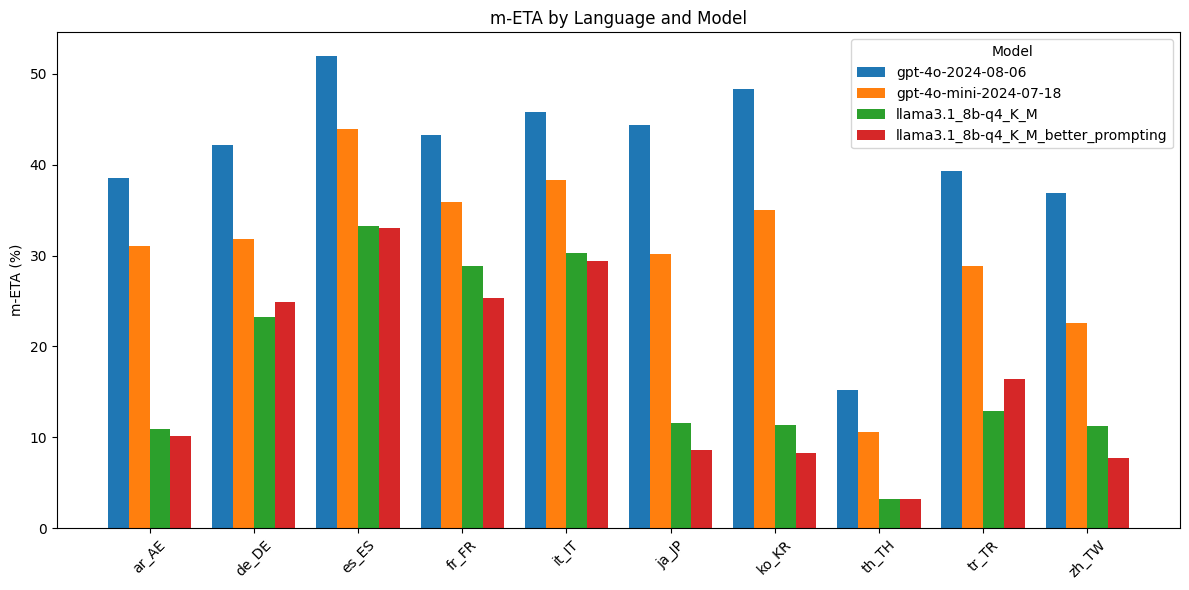

In [22]:
x = np.arange(len(meta_languages))
width = 0.8 / max(1, len(model_scores))  # width of each bar

fig, ax = plt.subplots(figsize=(12, 6))

for idx, (model, scores) in enumerate(sorted(model_scores.items())):
    y = [scores.get(lang, 0) for lang in meta_languages]
    ax.bar(x + idx * width, y, width, label=model)

ax.set_ylabel('m-ETA (%)')
ax.set_title('m-ETA by Language and Model')
ax.set_xticks(x + width * (len(model_scores) - 1) / 2)
ax.set_xticklabels(meta_languages, rotation=45)
ax.legend(title='Model')
plt.tight_layout()
plt.show()

In [5]:
comet_score_files = glob.glob(os.path.join(PREDICTIONS_DIR, '*', 'validation', 'comet_scores.json'))

comet_model_scores = {}
comet_languages = set()

for file in comet_score_files:
    model_name = os.path.basename(os.path.dirname(os.path.dirname(file)))
    with open(file, 'r', encoding='utf-8') as f:
        scores = json.load(f)
        filtered = [entry for entry in scores if 'language' in entry and 'comet_system_score' in entry]
        comet_model_scores[model_name] = {entry['language']: entry['comet_system_score'] for entry in filtered}
        comet_languages.update(entry['language'] for entry in filtered)

comet_languages = sorted(comet_languages)

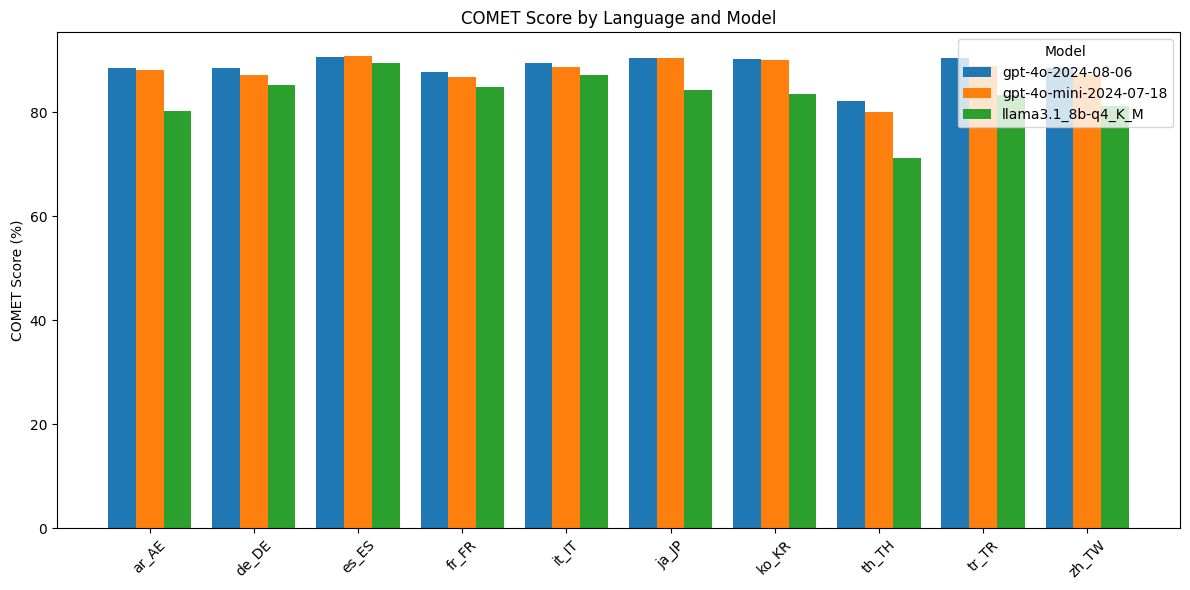

In [6]:
x = np.arange(len(comet_languages))
width = 0.8 / max(1, len(comet_model_scores))

fig, ax = plt.subplots(figsize=(12, 6))
for idx, (model, scores) in enumerate(sorted(comet_model_scores.items())):
    y = [scores.get(lang, 0) for lang in comet_languages]
    ax.bar(x + idx * width, y, width, label=model)

ax.set_ylabel('COMET Score (%)')
ax.set_title('COMET Score by Language and Model')
ax.set_xticks(x + width * (len(comet_model_scores) - 1) / 2)
ax.set_xticklabels(comet_languages, rotation=45)
ax.legend(title='Model')
plt.tight_layout()
plt.show()